# Unsupervised Learning: K-means clustering

**Unsupervised learning** techniques look for clusters in the data. Unsupervised learning is used to find and group together related data. It allows machines to learn in an unsupervised way, although, often we test out unsupervised learning algorithms on datasets which do have labels, and we don't give the algorithm the labels until the end to see if the algorithm gets it correct.

**k-means** is an unsupervised **clustering** algorithm that can find clusters in data. It works best when the clusters are spherical and the same size and density as one another.


To evaulate the k-means clusters, we calculate the sum of squared error (SSE). 
For each point, get the distance between a point x and the centroid of the cluster, then square that distance and sum for all points. 
$$
SSE = \sum_{i=1}^{k} \sum_{x \in C_i} (dist(i, centroid_c))^2
$$
We could simply sum the distances, but as some will be positive and some negative they could cancel out and gives us a lower measure. So we square the errors instead. 

The analaous measure of error in regression modelling are $R^2$ values, which is the sum of squared distances between the points and the model (i.e. the best fit line). The SSE is the same thing, except here we are care about the distance to the nearest cluster.

**In the KMeans package, the SSE is given by `.inertia_`**

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
%matplotlib inline

from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# K-means, with PCA, on a wine dataset

The dataset to be analysed is a result of a chemical analysis of wines grown in a particular region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The attributes are: Alcohol, Malic acid, Ash, Alkalinity of ash, Magnesium, Total phenols, Flavonoids, Nonflavonoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, and Proline. 

Reference for this data: 
Forina, M. et al, PARVUS -
An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.

In [12]:
wine_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Total phenols', \
              'Flavonoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline']
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = wine_names) 
wine_df = pd.DataFrame(wine_data)

In [13]:
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Column[0] is the class column, denoting which vineyard (1, 2 or 3) the wine was sourced from.

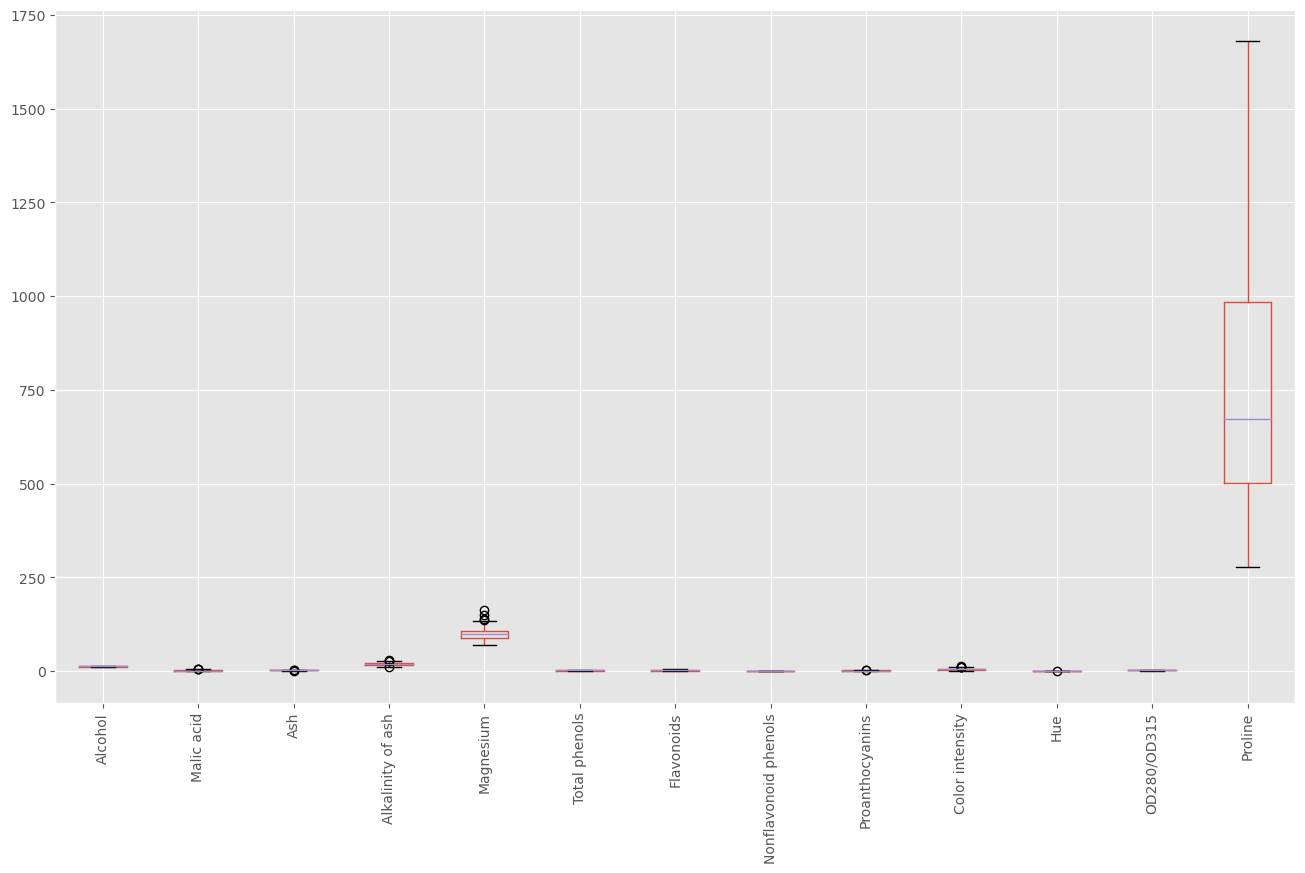

In [14]:
wine_df.boxplot(column=['Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Total phenols', \
              'Flavonoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline'], rot=90);

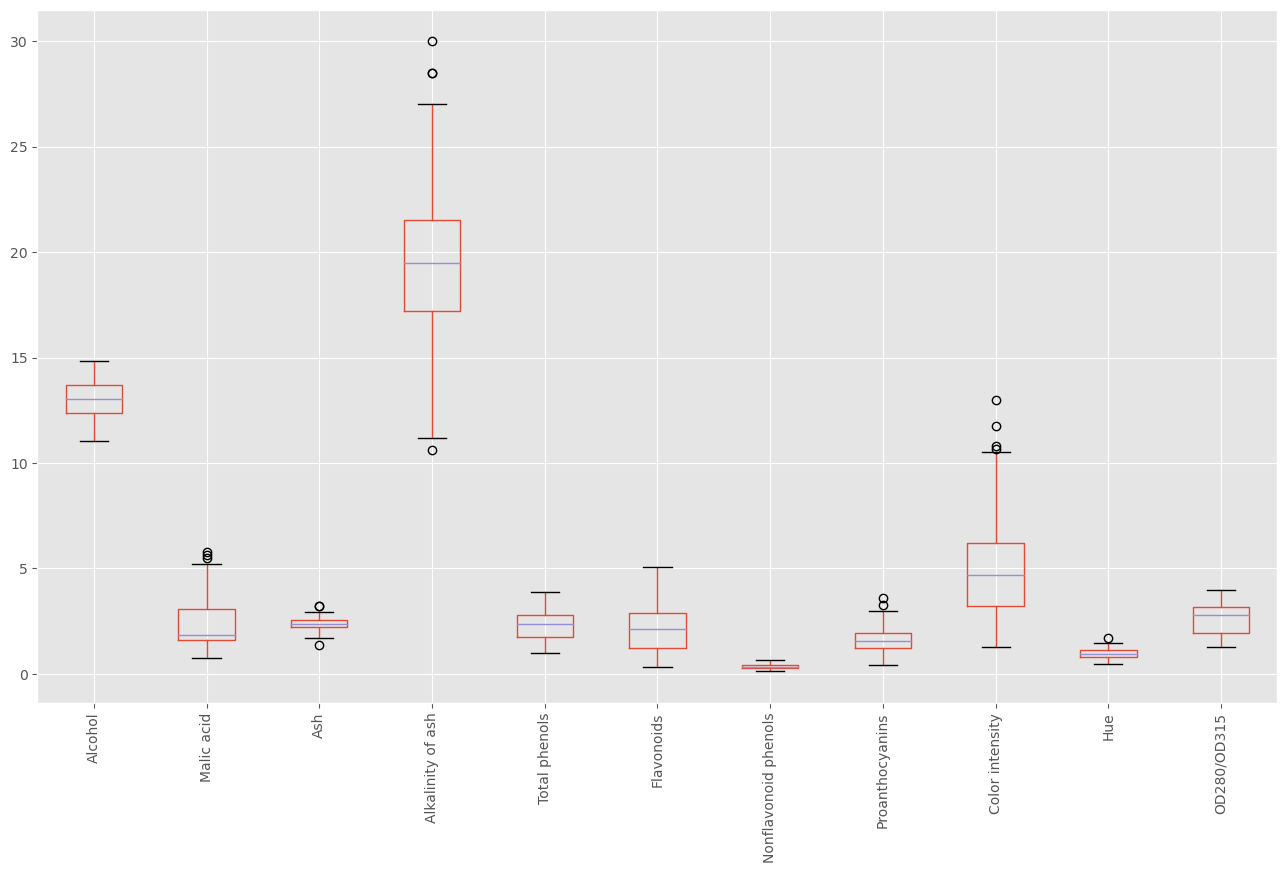

In [17]:
#removed proline and magnesium to visualise the rest of the data
wine_df.boxplot(column=['Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Total phenols', \
              'Flavonoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315'],
               rot=90);

Can alcohol content be inferred from the wine's colour?

<AxesSubplot:xlabel='Alcohol', ylabel='Hue'>

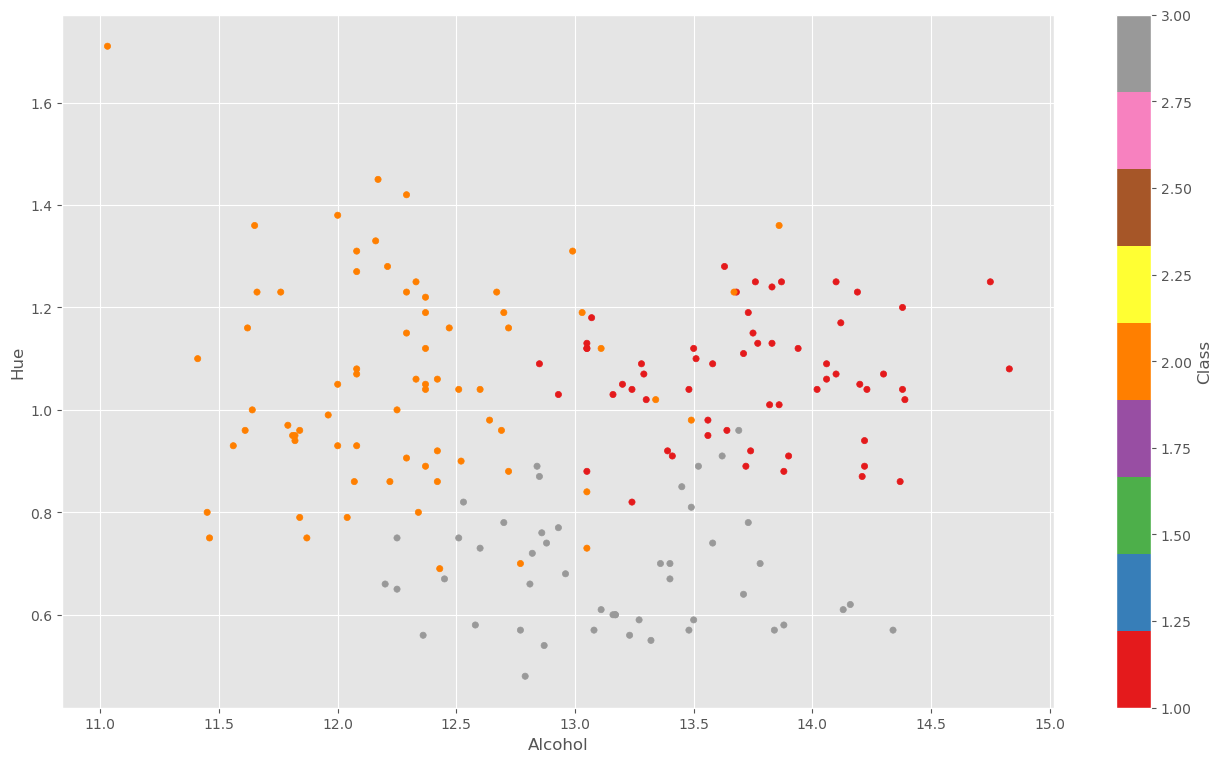

In [18]:
wine_df.plot.scatter(x = 'Alcohol', y = 'Hue', c= 'Class', colormap='Set1')

There are three overlapping clusters - i.e., each vineyard produces a unique 'brand' of wine, though there is no correlation between the hue of the wine and alcohol content.

Looking at the relationship between flavonoids and total phenols:

<AxesSubplot:xlabel='Flavonoids', ylabel='Total phenols'>

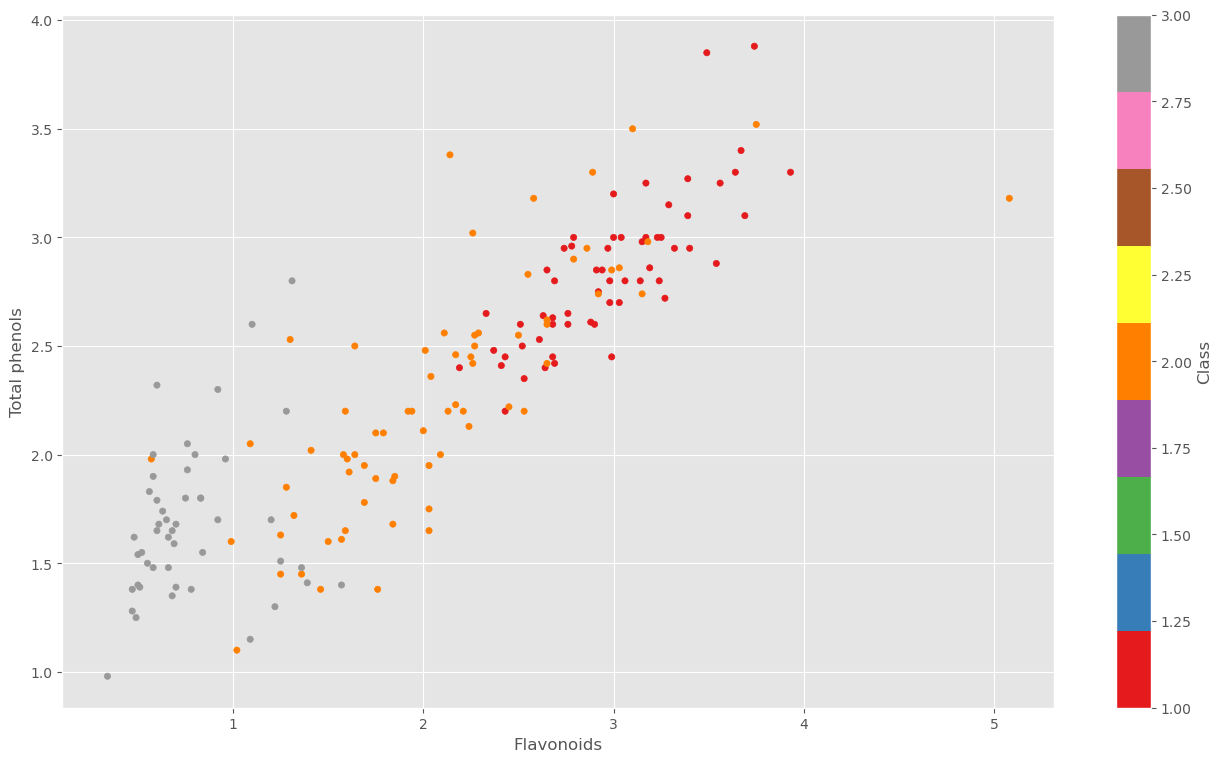

In [19]:
wine_df.plot.scatter(x = 'Flavonoids', y = 'Total phenols', c= 'Class', colormap='Set1')

They are positively correlated which is expected. Flavonoids are natural products that very often contain phenol functional groups.

Attempting a KMeans clustering algorithm on the Alcohol-Hue data dimension:

<AxesSubplot:xlabel='Alcohol', ylabel='Hue'>

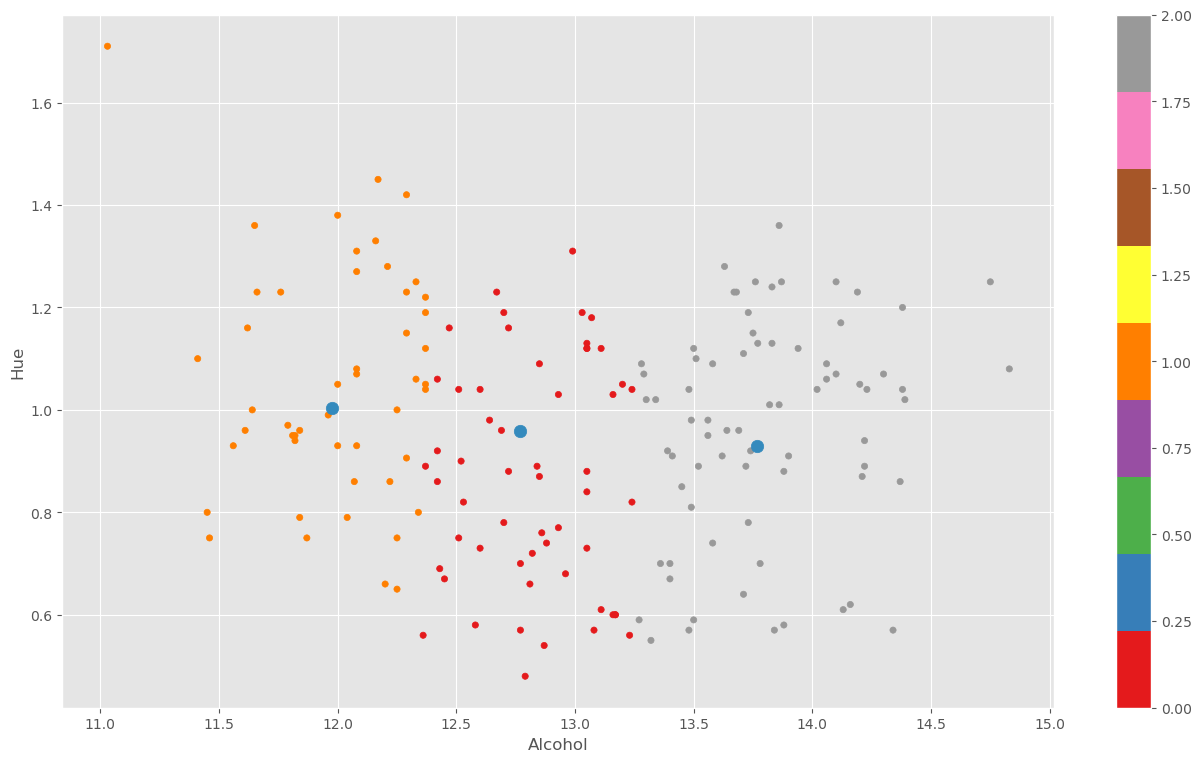

In [20]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(wine_df.iloc[:,[11,1]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(wine_df.iloc[:,[11,1]].columns.values))
fig, ax = plt.subplots(1, 1)
wine_df.plot.scatter(x = 'Alcohol', y = 'Hue', c= kmeans.labels_, colormap='Set1', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Alcohol', y = 'Hue', ax = ax,  s = 80, mark_right=False)

This doesn't match the true dataset clusters - KMeans is insufficient at distinguishing overlapping clusters.

Instead, we can utilise Principal Component Analysis (PCA) to describe the dataset in a different coordinate system such that the clusters can be separated to match the true dataset.

## PCA

PCA is a co-ordinate transform to **generalised coordinates** based on the **variance** in the data, this allows us to re-express the data in the new generalised coordinates, and as these try to include as much variance as possible in each coordinate, we can get an overview of the entire dataset from only plotting the data in 2-dimensional space. This allows us to visualise a high-dimensional dataset on a 2-d graph. 

In this technique, the new coordinates are called **principal components** and we're doing **principal component analysis** (**PCA**).

A metaphor to help understand this is vibrations. If you take the Carteisan coordinates of a molecule, say, $H{_2}O$, as it moves around in space, you have have all the information of the motion of that molecule in what is called localised coordinates (the Cartesian coordinates in space are localised on each atom). This is equivalent to the input data in terms of the 13 analytes (i.e. Alcohol and Hue are two dimensions of the input data). As chemists, we naturally do a coordinate transform when thinking about molecules from Cartesian coordiantes to internal, chemical coordinates like bond length ($r_{O-H^{1}}$ and $r_{O-H^{2}}$) and bond angle ($\theta_{H^{1}OH^{2}}$). A further coordinate transform chemists do easily is to the generalised coordinates of molecular vibrations, for example, we know that water has 3 vibrations: a symmetric stretch of the O-H bonds, an asymmetric stretch of the O-H bonds and a angle stretch of the H-O-H bond angle. When doing a coordinate transform from Cartesian coordinates to generalised coordinates we must have the same number of generalised coordinates as Cartesian coordinates. As water has 3 atoms (and there are 3 dimensions of space), we should have 9 generalised coordinates. Three of them are the vibrations mentioned above, the other 6 are the rigid body degrees of freedom, which are the movement of the entire molecule (with no internal deformation) in the $+x$, $-x$, $+y$, $-y$, $+z$ and $-z$ directions (6 generalised coordinates). Generalised coordinates are coordinates that are spread over the entire molecule, and these motions are spread over the entire molecule. 

If we switch coordinates to a new coordinate system, we should be able to explain the data in terms of the new coordinate system (this is coordinate transform). For the water molecule example, we could describe a water molecule tumbling about in terms of its cartesian coordinates of the atoms, or, we could describe the same motion in terms of vibrations and rigid body degrees of freedom. As chemists, we rarely care exactly where a molecule is in space, but we do care about the vibrations as these are probed by spectroscopy, and thus we only care about the 3 vibrations. Throwing away the 6 rigid body degrees of freedom in the description of water is a form of **coarse-graining** or **approximating** the system. 

You can think of the principal components as the **vibrations of the dataset** and we're doing something not unlike spectroscopy to map the data. The input data analytes are the localised coordinates. We will do a coordinate transform into the generalised coordinates from principal component analysis and re-express the wine data in terms of these new coordinates. The principal components are ordered such that the first principal component captures the largest amount of variance in the dataset, and the second principal component captures the next largest amount of variance in the dataset and so on. The vibrations of a molecule with the lowest energy are the most important to understand if we want to understand a molecule's dynamics (as the lowest energy vibrations are the most common), then the second lowest vibration etc. Similarly, the first PCA is the most important to understand if we want to characterise the dataset, then the second component, and so on. 

### Pre-processing the wine dataset:

In [21]:
#new dataframe, removing the class column
df=wine_df.iloc[:,1:]

Generally in machine learning we **standardize** the data, we do this to remove the effects of the different scales of the features in the 'real world' which can swamp the effects of the variance of the features in the dataset, and to make learning easier. It's also the first step in doing a PCA. If we did not do this, the signal from the large-valued analyte data (Magnesium and Proline in our data) would overwhelm the signal from the rest of the data:

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(wine_df)

In [24]:
# Create a PCA instance with 13 features: pca
pca = PCA(n_components=13)

Now, we do the PCA, by doing what is called a `fit_transform` on the standardized dataset, and the output is the principal components. This is a coordinate transform of the data to give generalised coordinates based on the variance in the dataset. Mathematically, this is done by matrix diagonalisation of the standardised matrix.

In [25]:
# do the PCA on the x_std matrix, and save the outputs as principalComponents
principalComponents = pca.fit_transform(X_std)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

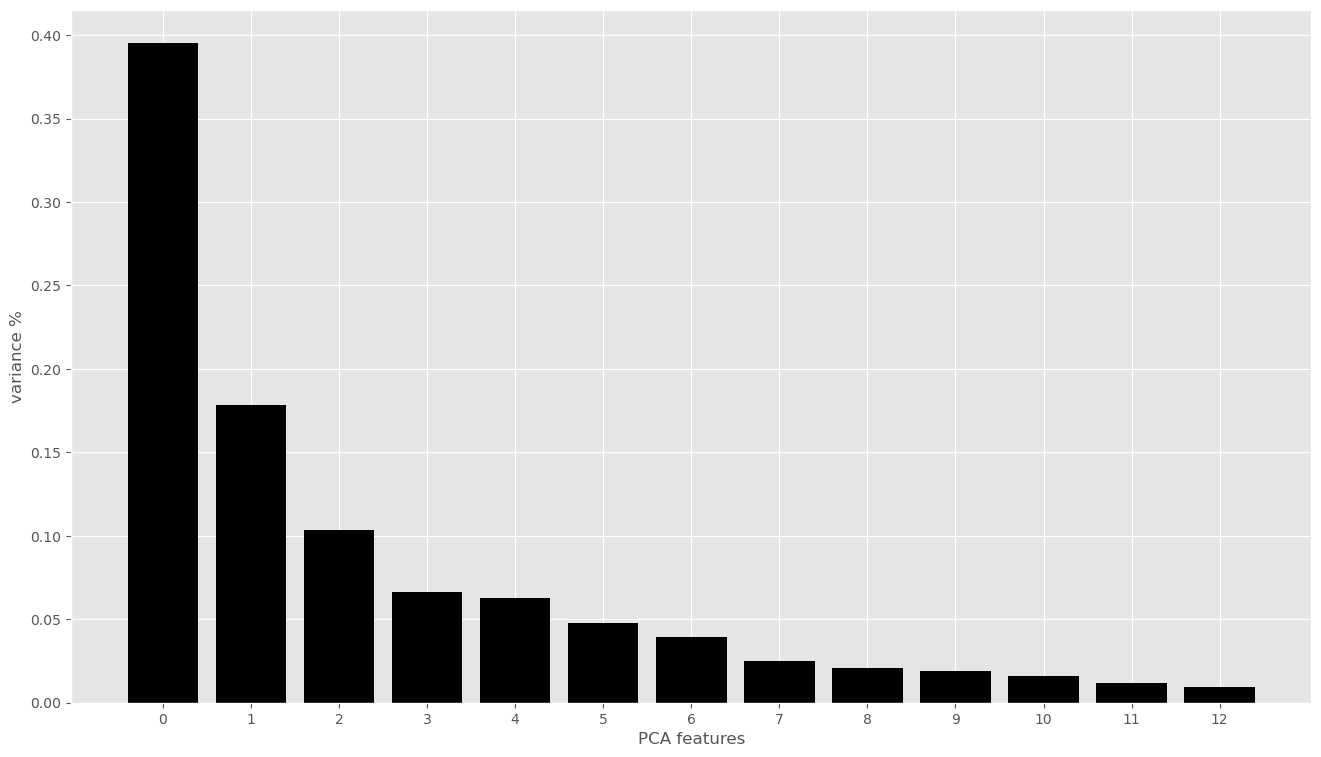

In [29]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

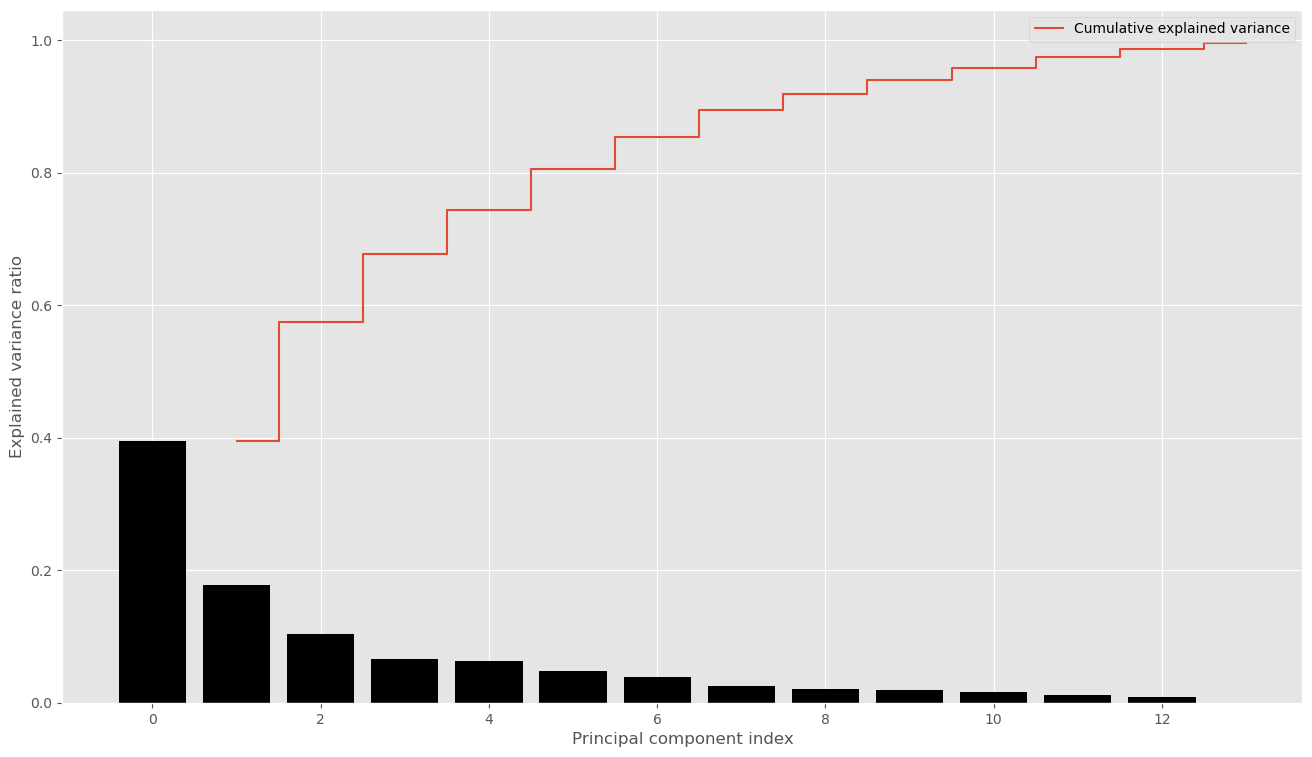

In [31]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

The 13 generalised coordinates for the 13-dimensional dataset. PC-0 explains ~40% of the variance in the data, PC-1 explains ~18%, ...

To simplify the system, **coarse-graining** is done where the PCs that don't explain very much variance are discarded. If we only used the first 5 PCs, this explains ~80% of the variance in the data, so we could **coarse-grain** the system and just use a 5-dimensional **approximation** to the data instead of the full 13-dimensional one. This type of pre-processing is termed **dimensionality reduction** in the context of machine-learning.

Visualising the dataset in the first 2 principal components (explaining just under 60% of the variance in the data) we see there are potentially 3 clusters - which is a good sign:

Text(0, 0.5, 'PCA 2')

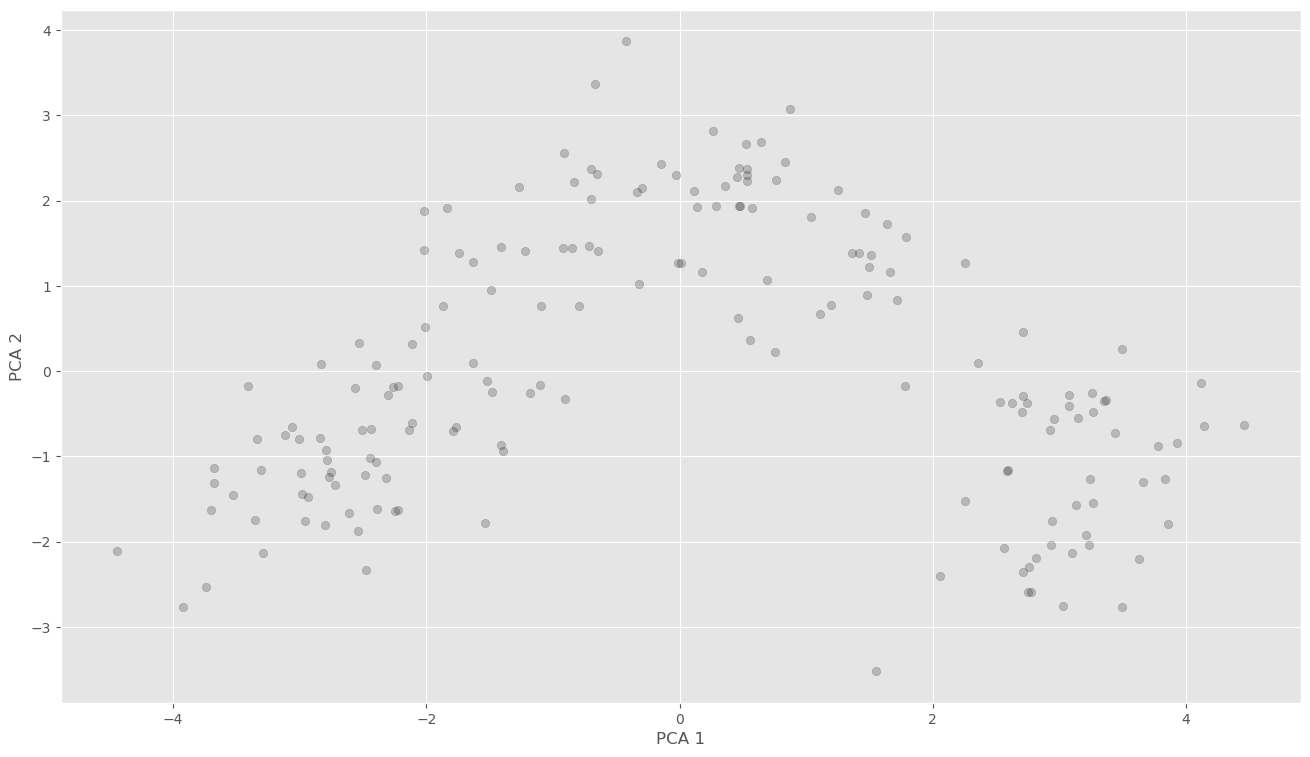

In [35]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.2, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [36]:
PCA_components.iloc[:,:2].head()

,0,1
0,-3.522934,-1.453098
1,-2.528858,0.330019
2,-2.785029,-1.036936
3,-3.922588,-2.768210
4,-1.407511,-0.867773


We can perform a KMeans clustering algorithm on the first two PCs to observe whether the correct clusters are identified:

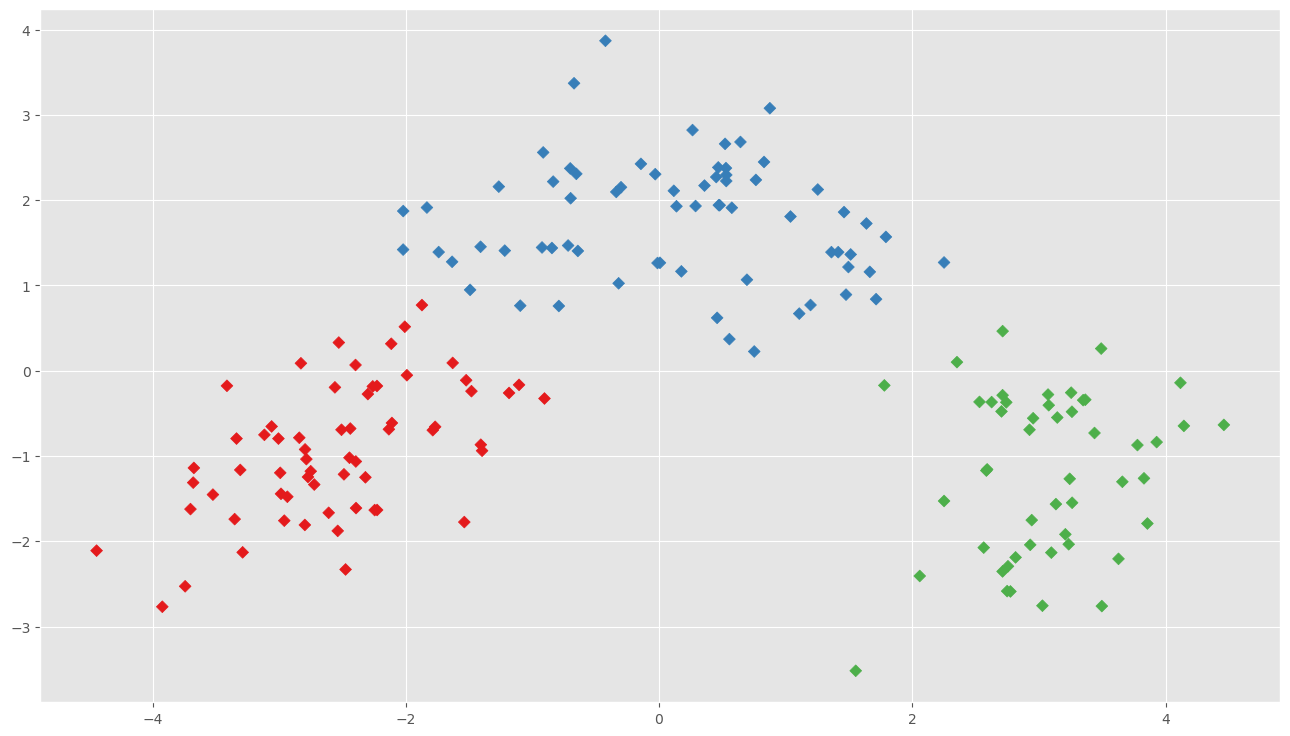

In [37]:
# This instantiates a KMeans object, calls it kmeans, and then does a fit with the first PCA component
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(PCA_components.iloc[:,:2])
# This creates a DataFrame called centroids_df that containes the cluster centers with the names of the PCA components
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(PCA_components.iloc[:,:2].columns.values))
# The next 3 lines plots the data in terms of the first and second principal components and colors them 
# according to which cluster the datapoints were assigned to
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(PCA_components.iloc[:,:2])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

This looks good. We can compare this to the ground truth (the true clusters from the dataset):

Text(0, 0.5, 'PCA 2')

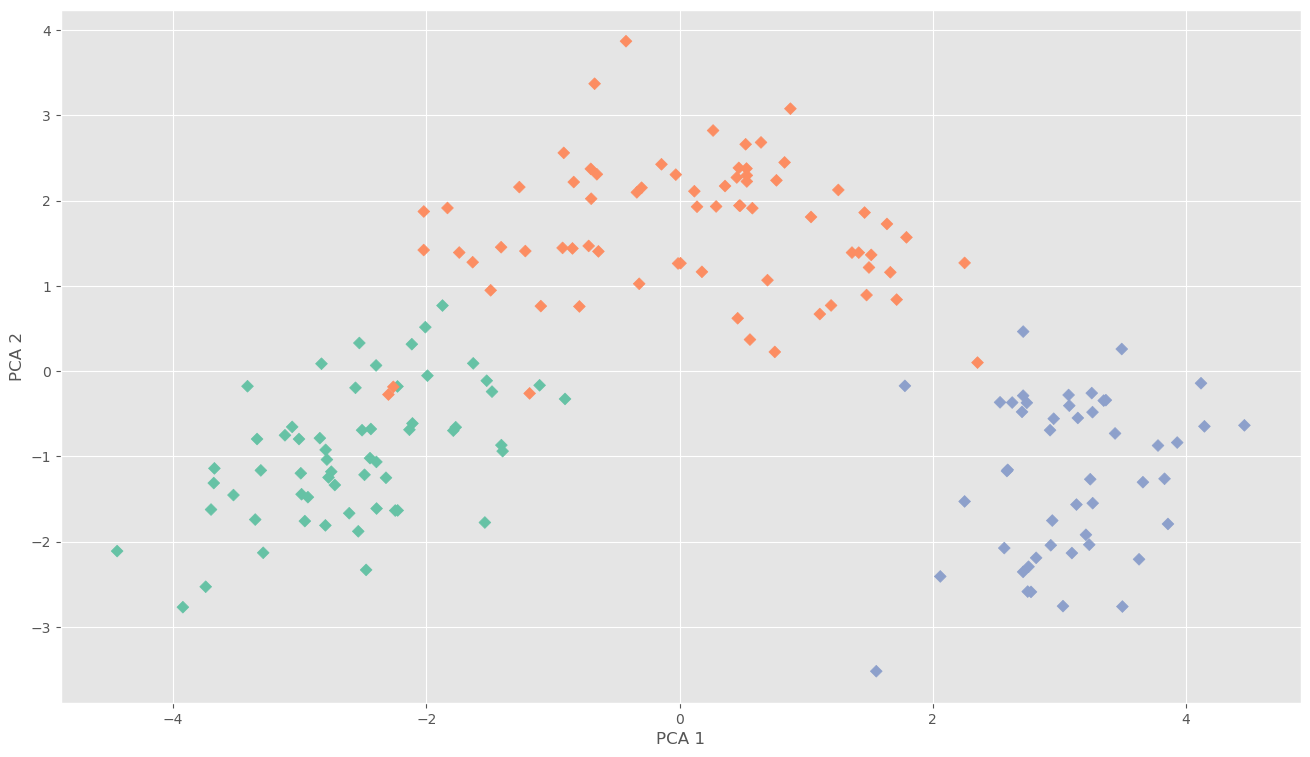

In [38]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=wine_df['Class'], cmap='Set2', marker='D', vmax=9)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Adding more PCs worsens the model:

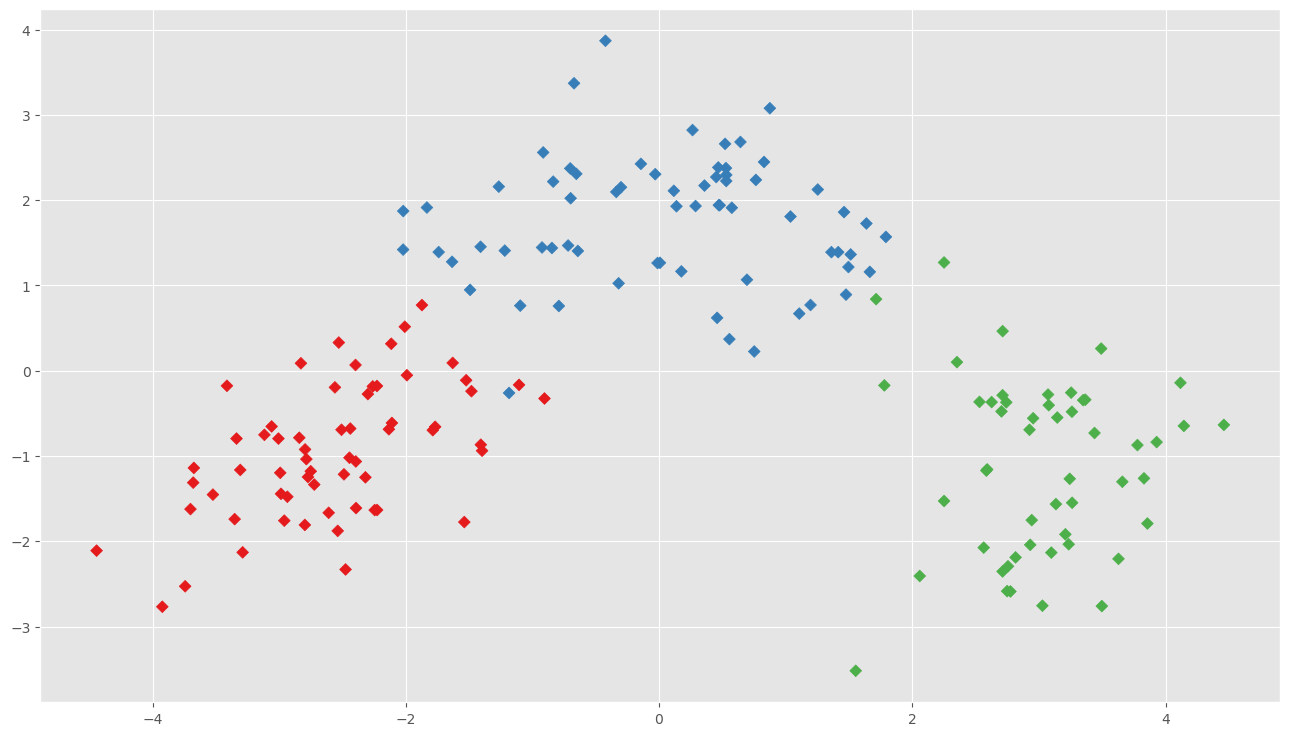

In [40]:
#3 PCs
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(PCA_components.iloc[:,:3])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(PCA_components.iloc[:,:3].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(PCA_components.iloc[:,:3])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

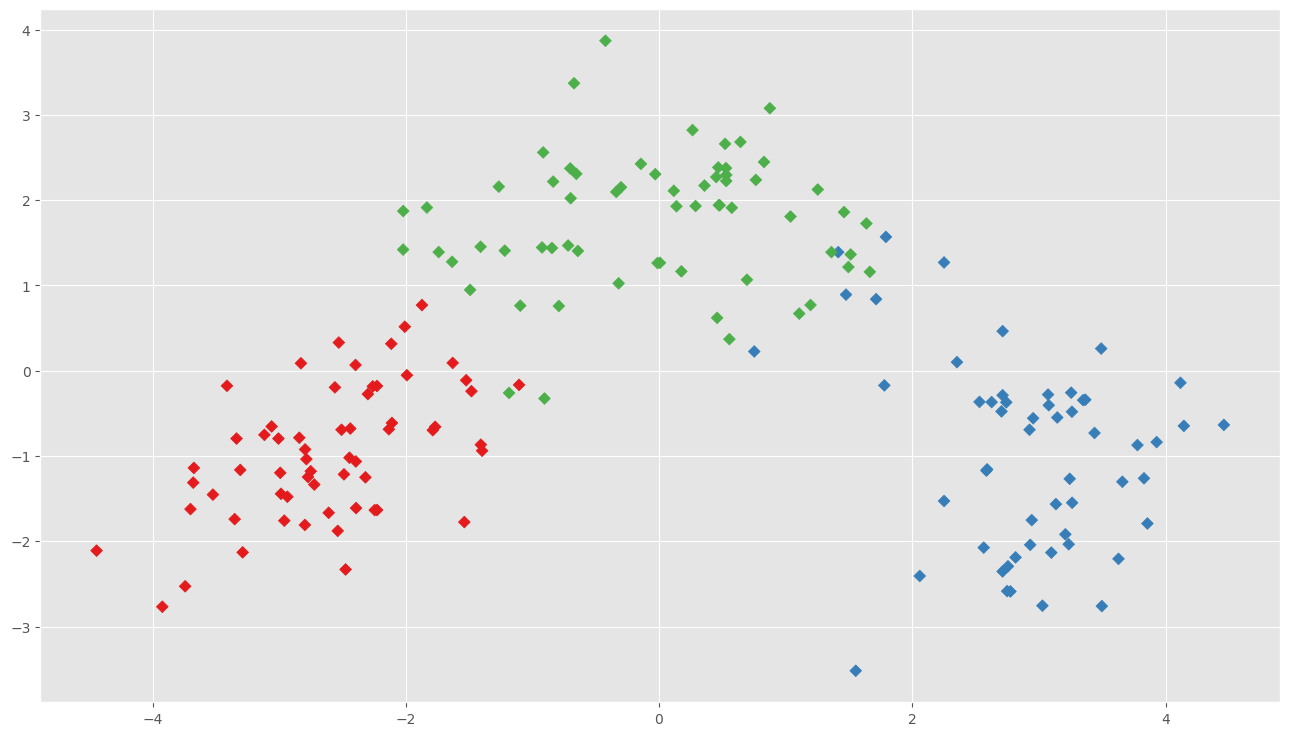

In [41]:
#4 PCs
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(PCA_components.iloc[:,:4])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(PCA_components.iloc[:,:4].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(PCA_components.iloc[:,:4])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

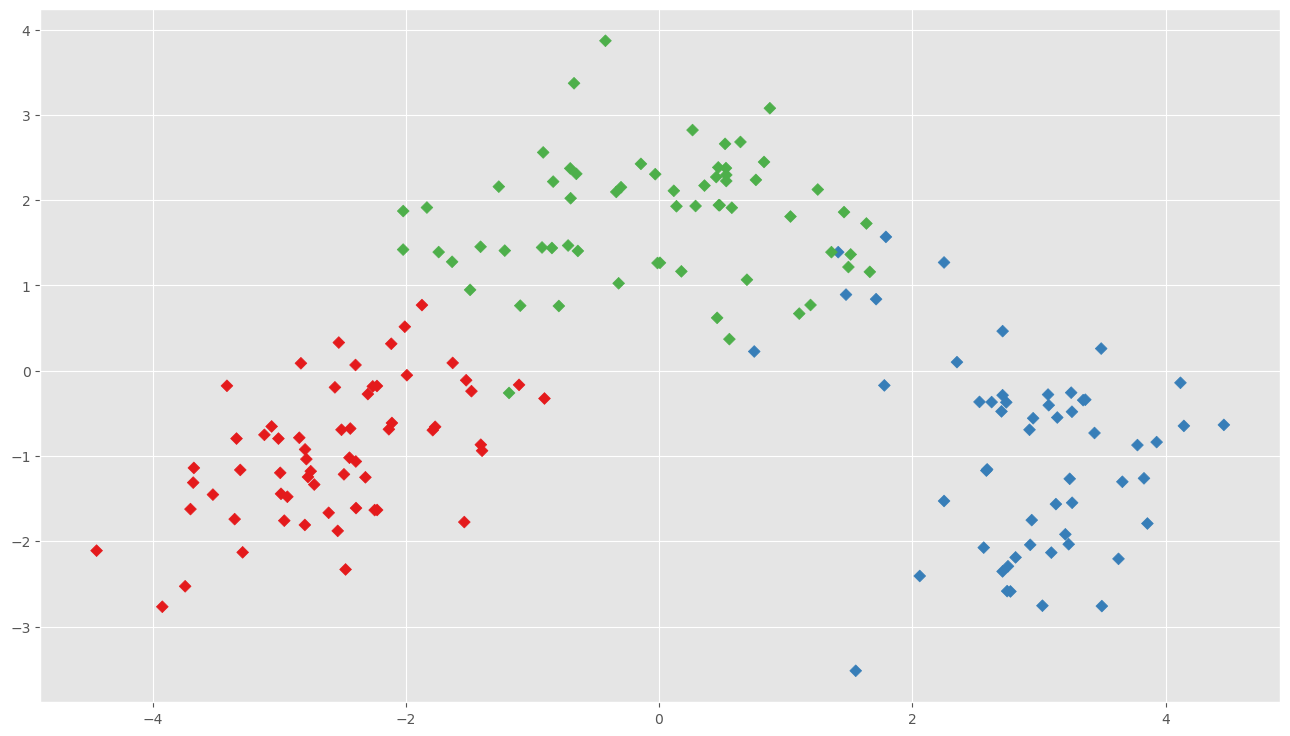

In [42]:
#all PCs
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(PCA_components.iloc[:,:])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(PCA_components.iloc[:,:].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(PCA_components.iloc[:,:])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

Another approach is to perform the machine learning on the original data and then use PCA to visualise the results:

In [44]:
df.head()

,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


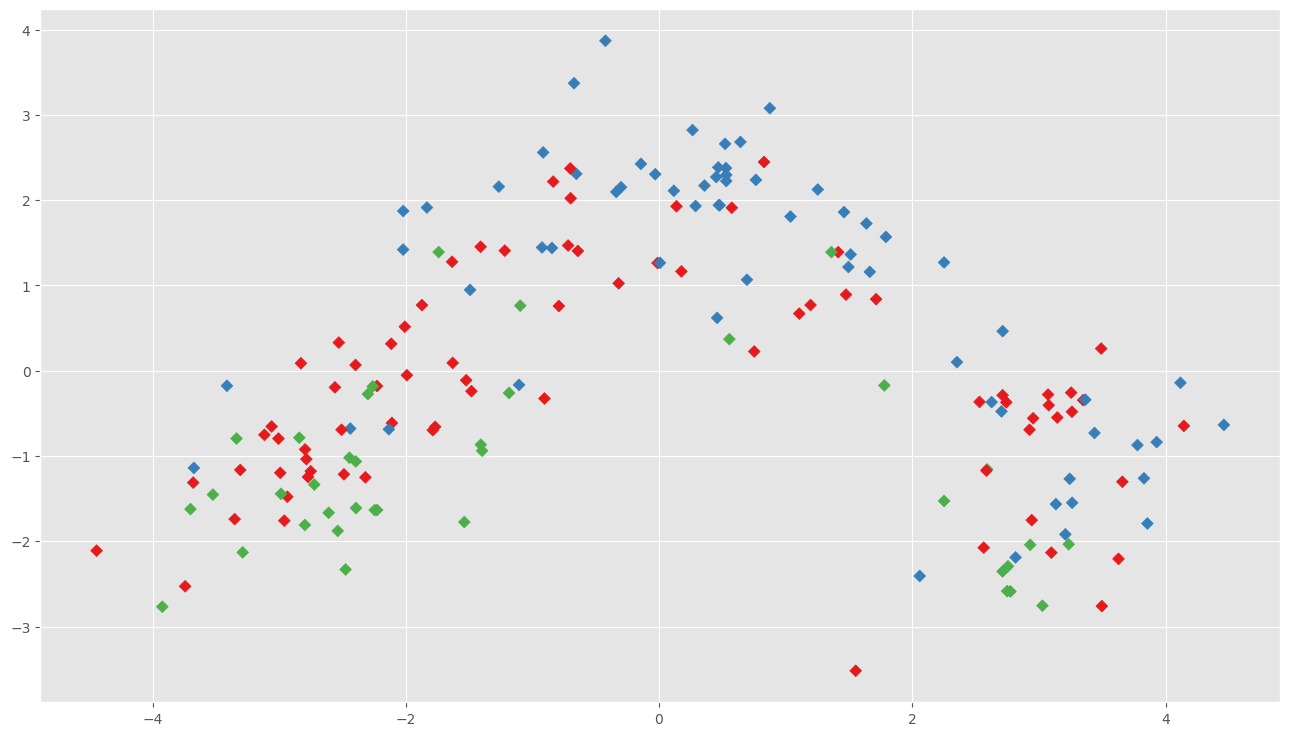

In [47]:
#Magnesium and Proline
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(df.iloc[:,[4,11]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(df.iloc[:,[4,11]].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(df.iloc[:,[4,11]])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

Magnesium and proline content have no correlation across the three types of wine - these two features give very poor clustering (significantly different to the ground truth).

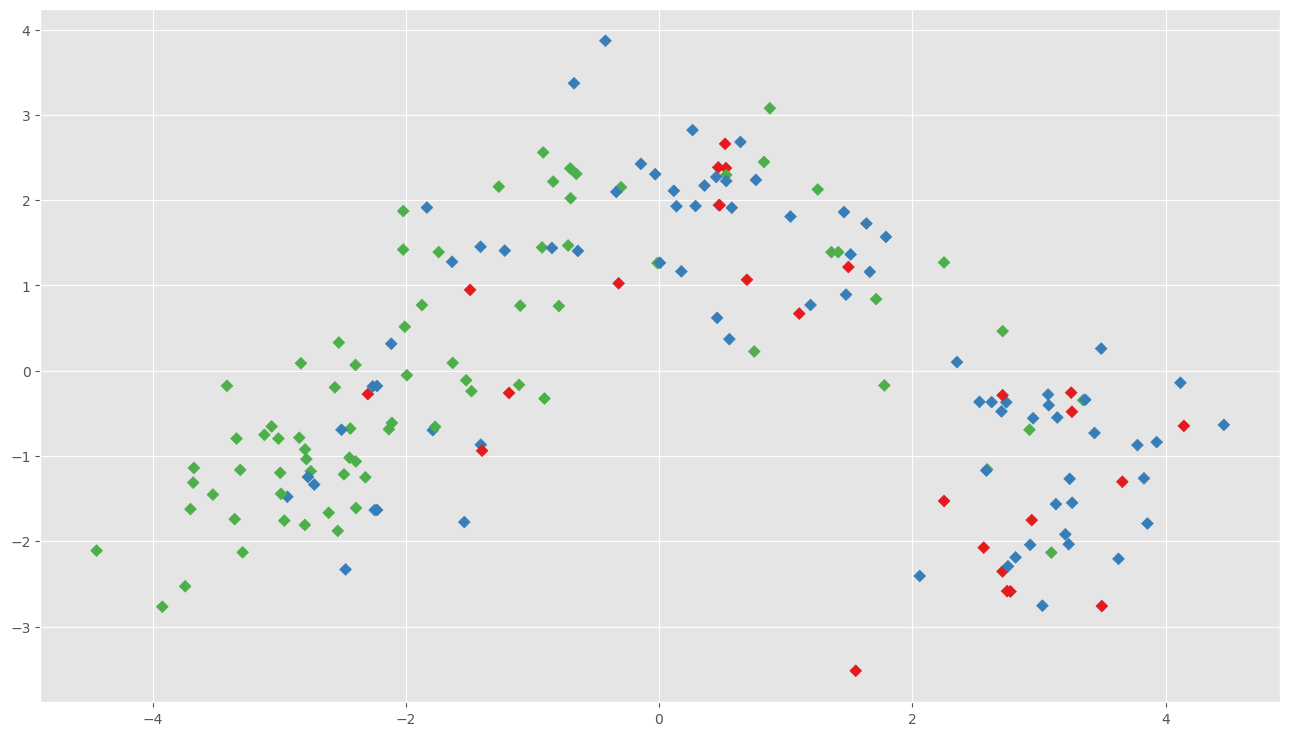

In [48]:
#Malic acid and alkalinity of ash
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(df.iloc[:,[1,3]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(df.iloc[:,[1,3]].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(df.iloc[:,[1,3]])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

Malic acid and alkalinity are a slight improvement, but still give very poor clustering.

Using all features from the wine dataset:

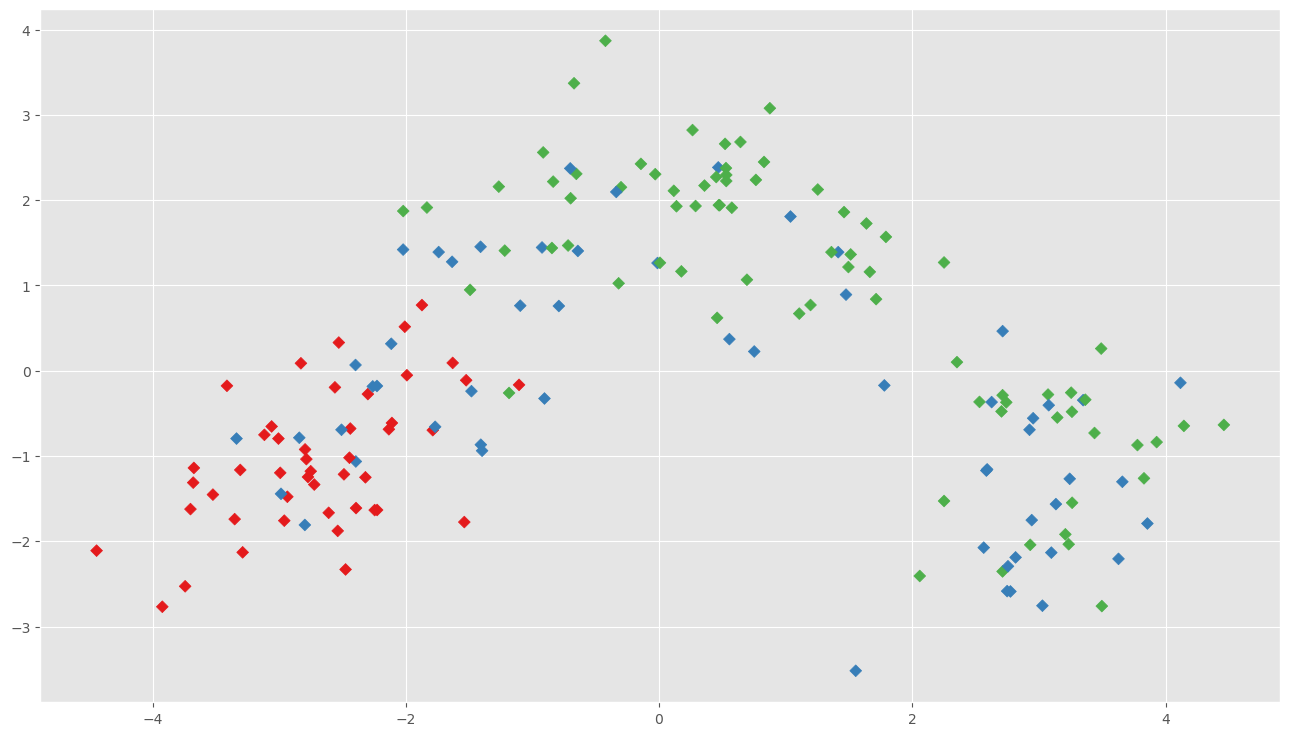

In [49]:
#All features
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(df.iloc[:,:])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(df.iloc[:,:].columns.values))
fig, ax = plt.subplots(1, 1)
labels = kmeans.predict(df.iloc[:,:])
ax=plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=labels, cmap='Set1', marker='D', vmax=8)

We still obtain poor clustering. In this case, pre-processing of the wine dataset with PCA has enabled a much more accurate model to be obtained that closely resembled the clustering of the true dataset.